In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

np.random.seed(25)

Using TensorFlow backend.


In [3]:
# 下載 mnist 資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train: trainning data
# y_train: labels of each trainning data
# x_test: testing data
# y_test: labels of each testing data

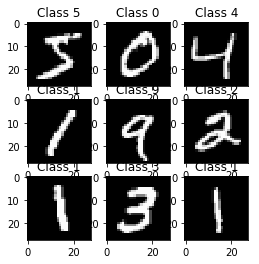

In [4]:
plt.figure(figsize=(4,4))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title("Class %s" %y_train[i])

In [5]:
# add channel
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
print(x_train.shape)
print(x_test.shape)
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

In [7]:
from keras.utils import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [8]:
model = Sequential()

model.add(Conv2D(16, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))

model.add(Conv2D(36, (5,5), activation="relu", padding="same", data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [9]:
layer_utils.print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [10]:
# 定義訓練方式
# loss function: 交叉熵
# optimizer: Adam
# 評估模型: 準確率
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08, data_format="channels_last")
train_generator = gen.flow(x_train_normalized, y_train, batch_size=300)
test_gen = ImageDataGenerator(data_format="channels_last")
test_generator = test_gen.flow(x_test_normalized, y_test, batch_size=300)

In [11]:
# 開始訓練
y_train_onehot = np_utils.to_categorical(y_train)
#train_history = model.fit_generator(train_generator, steps_per_epoch=60000//300, epochs=10, 
#                    validation_data=test_generator, validation_steps=10000//300)
train_history = model.fit(x_train_normalized, y_train_onehot, validation_split=0.2, epochs=10, batch_size=300, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s - loss: 0.4935 - acc: 0.8468 - val_loss: 0.1073 - val_acc: 0.9678
Epoch 2/10
48000/48000 [==============================] - 3s - loss: 0.1359 - acc: 0.9599 - val_loss: 0.0698 - val_acc: 0.9784
Epoch 3/10
48000/48000 [==============================] - 3s - loss: 0.0992 - acc: 0.9706 - val_loss: 0.0606 - val_acc: 0.9808
Epoch 4/10
48000/48000 [==============================] - 3s - loss: 0.0813 - acc: 0.9759 - val_loss: 0.0500 - val_acc: 0.9847
Epoch 5/10
48000/48000 [==============================] - 3s - loss: 0.0692 - acc: 0.9798 - val_loss: 0.0452 - val_acc: 0.9865
Epoch 6/10
48000/48000 [==============================] - 3s - loss: 0.0596 - acc: 0.9820 - val_loss: 0.0398 - val_acc: 0.9883
Epoch 7/10
48000/48000 [==============================] - 3s - loss: 0.0517 - acc: 0.9846 - val_loss: 0.0402 - val_acc: 0.9874
Epoch 8/10
48000/48000 [==============================] - 3s 

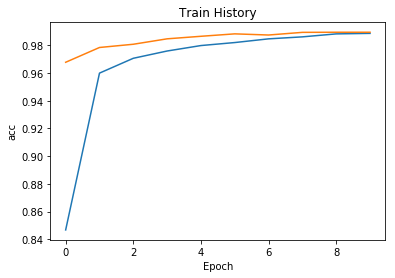

In [12]:
show_train_history(train_history, 'acc', 'val_acc')

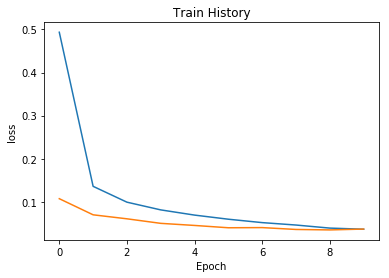

In [13]:
show_train_history(train_history, 'loss', 'val_loss')

In [14]:
y_test_onehot = np_utils.to_categorical(y_test)
score = model.evaluate(x_test, y_test_onehot)
print()
print("Accuracy {}%".format(score[1]))

 9792/10000 [============================>.] - ETA: 0s
Accuracy 0.991%


In [15]:
results = model.predict_classes(x_test)
print()
print(results)

 9248/10000 [==========================>...] - ETA: 0s
[7 2 1 ..., 4 5 6]


In [16]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, results)

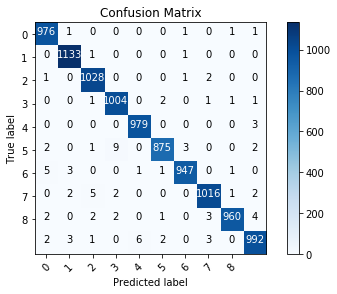

In [18]:
plot_confusion_matrix(cm, range(0, 9))

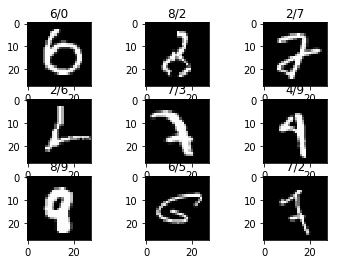

In [19]:
incorrect = np.where(y_test != results)[0]
test_set = np.squeeze(x_test, axis=3)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    idx = incorrect[i]
    img = test_set[idx]
    plt.imshow(img, cmap="gray")
    plt.title("{}/{}".format(y_test[idx], results[idx]))

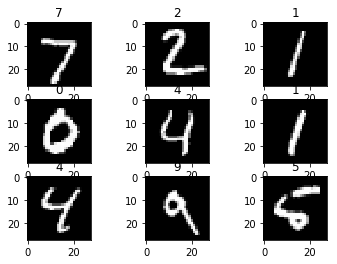

In [20]:
correct = np.where(y_test == results)[0]
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    idx = correct[i]
    img = test_set[idx]
    plt.imshow(img, cmap="gray")
    plt.title("{}".format(y_test[idx]))

In [29]:
model.save_weights("cnn.h5")

# Another model

In [21]:
from keras.layers.normalization import BatchNormalization

In [22]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), data_format="channels_last", input_shape=(28,28,1)))
model2.add(Activation('relu'))
# BatchNormalization(axis=-1)
model2.add(Conv2D(32, (3, 3), data_format="channels_last"))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))

# BatchNormalization(axis=-1)
model2.add(Conv2D(64,(3, 3), data_format="channels_last"))
model2.add(Activation('relu'))
# BatchNormalization(axis=-1)
model2.add(Conv2D(64, (3, 3), data_format="channels_last"))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))

model2.add(Flatten())
# Fully connected layer

# BatchNormalization()
model2.add(Dense(512))
model2.add(Activation('relu'))
# BatchNormalization()
model2.add(Dropout(0.2))
model2.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model2.add(Activation('softmax'))

In [23]:
model2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [24]:
train_history = model2.fit(x_train_normalized, y_train_onehot, validation_split=0.2, epochs=10, batch_size=300, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s - loss: 0.2882 - acc: 0.9149 - val_loss: 0.0675 - val_acc: 0.9809
Epoch 2/10
48000/48000 [==============================] - 5s - loss: 0.0574 - acc: 0.9824 - val_loss: 0.0451 - val_acc: 0.9876
Epoch 3/10
48000/48000 [==============================] - 5s - loss: 0.0359 - acc: 0.9889 - val_loss: 0.0404 - val_acc: 0.9874
Epoch 4/10
48000/48000 [==============================] - 5s - loss: 0.0270 - acc: 0.9913 - val_loss: 0.0366 - val_acc: 0.9884
Epoch 5/10
48000/48000 [==============================] - 5s - loss: 0.0219 - acc: 0.9928 - val_loss: 0.0362 - val_acc: 0.9896
Epoch 6/10
48000/48000 [==============================] - 5s - loss: 0.0175 - acc: 0.9943 - val_loss: 0.0286 - val_acc: 0.9918
Epoch 7/10
48000/48000 [==============================] - 5s - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0317 - val_acc: 0.9911
Epoch 8/10
48000/48000 [==============================] - 5s 

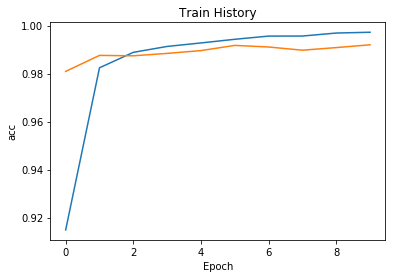

In [25]:
show_train_history(train_history, 'acc', 'val_acc')

In [26]:
score = model.evaluate(x_test, y_test_onehot)
print()
print("Accuracy {}%".format(score[1]))

 9632/10000 [===========================>..] - ETA: 0s
Accuracy 0.991%


In [27]:
results = model.predict_classes(x_test)
print()
print(results)

 9088/10000 [==========================>...] - ETA: 0s
[7 2 1 ..., 4 5 6]


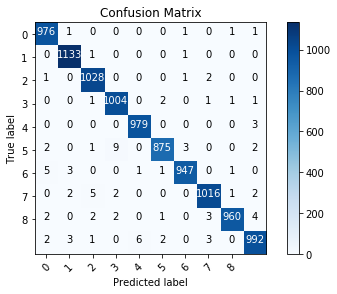

In [28]:
cm = confusion_matrix(y_test, results)
plot_confusion_matrix(cm, range(0, 9))